In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('data.csv')
df

,filename,ID,age,sex,LR,AMD,RVO,Gla,MH,DR,RD,RP,AO,DM
0,000000_00.jpg,3090,78,M,L,0,0,0,0,0,0,0,0,0
1,000000_01.jpg,3090,78,M,R,0,0,0,0,0,0,0,0,0
2,000001_00.jpg,2702,76,F,L,0,0,0,0,0,0,0,0,0
3,000001_01.jpg,2702,76,F,R,0,0,0,0,0,0,0,0,0
4,000001_02.jpg,1136,69,M,L,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13042,005387_01.jpg,3657,73,F,L,0,0,0,0,0,0,0,0,0
13043,005387_02.jpg,173,73,F,R,0,0,0,0,0,0,0,0,0
13044,005387_03.jpg,3156,71,F,R,0,0,0,0,0,0,0,0,0
13045,005388_00.jpg,3156,71,F,L,0,0,0,0,0,0,0,0,0


In [7]:
df_t=df.loc[df['DR']==1]
df_t
df_t.loc[df['DM']==1]

,filename,ID,age,sex,LR,AMD,RVO,Gla,MH,DR,RD,RP,AO,DM
34,000011_01.jpg,3719,70,F,L,0,0,0,0,1,0,0,0,1
35,000012_00.jpg,3719,70,F,R,0,0,0,0,1,0,0,0,1
36,000012_01.jpg,3719,64,F,L,0,0,0,0,1,0,0,0,1
37,000012_02.jpg,3719,64,F,R,0,0,0,0,1,0,0,0,1
55,000020_03.jpg,2876,60,M,L,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13018,005379_00.jpg,2336,61,M,R,0,0,0,0,1,0,0,0,1
13019,005379_01.jpg,323,52,M,R,0,0,0,0,1,0,0,0,1
13020,005379_02.jpg,323,52,M,R,0,0,0,0,1,0,0,0,1
13021,005379_03.jpg,810,56,M,L,0,0,0,0,1,0,0,0,1


In [3]:
# label age group
def age_cate(x):
    if x<=10:
        a='0-10'
    elif x>10 and x<=20:
        a='11-20'
    elif x>20 and x<=30:
        a='21-30'
    elif x>30 and x<=40:
        a='31-40'
    elif x>40 and x<=50:
        a='41-50'
    elif x>50 and x<=60:
        a='51-60'
    elif x>60 and x<=70:
        a='61-70'
    elif x>70 and x<=80:
        a='71-80'
    elif x>80 and x<=90:
        a='81-90'
    else:
        a='>90'
    return a

In [5]:
np.mean(df['age'])
np.median(df['age'])

67.0

In [6]:
age=df[['age']]
age['age_cate']=age['age'].apply(lambda x: age_cate(x))
age['count']=1
age=age[['age_cate','count']]
age=age.groupby(['age_cate']).sum()
age=age.reset_index()
x_age=age['age_cate']
y_age=age['count']
age

,age_cate,count
0,0-10,5
1,11-20,79
2,21-30,92
3,31-40,425
4,41-50,1109
5,51-60,2276
6,61-70,4140
7,71-80,3861
8,81-90,1027
9,>90,33


In [7]:
sex=df[['sex']]
sex['count']=1
sex=sex.groupby(['sex']).sum()
sex=sex.reset_index()
x_sex=['female','male']
y_sex=sex['count']
sex

,sex,count
0,F,6268
1,M,6779


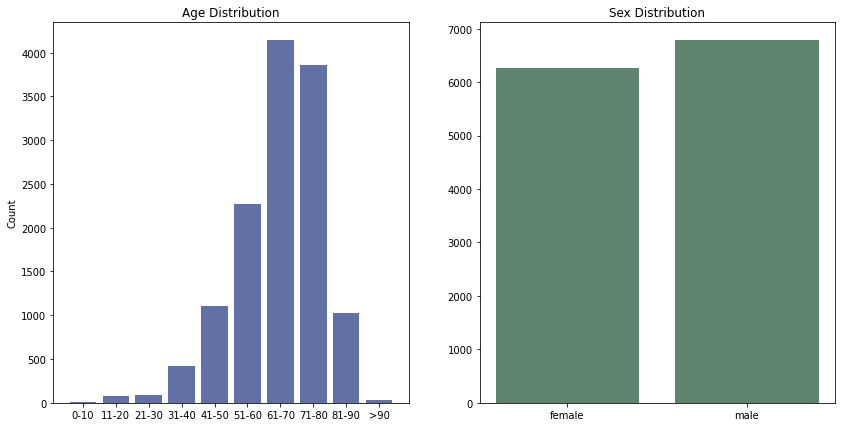

In [8]:
# plot of age and sex distribution
f, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(14, 7))

ax1.bar(x_age,y_age, color='#6171a6') # thickness=0.2
ax2.bar(x_sex, y_sex, color='#5f846d')
ax1.title.set_text("Age Distribution")
ax2.title.set_text("Sex Distribution")
ax1.set_ylabel('Count')
plt.show()

In [9]:
#1: healthy, 0:abnormal
def health(x):
    if x!=0:
        a=0
    else:
        a=1
    return a

In [10]:
df['HE_on']=df['AMD']+df['RVO']+df['Gla']+df['MH']+df['DR']+df['RD']+df['RP']+df['AO']+df['DM']
df['HE']=df['HE_on'].apply(lambda x: health(x))
df

,filename,ID,age,sex,LR,AMD,RVO,Gla,MH,DR,RD,RP,AO,DM,HE_on,HE
0,000000_00.jpg,3090,78,M,L,0,0,0,0,0,0,0,0,0,0,1
1,000000_01.jpg,3090,78,M,R,0,0,0,0,0,0,0,0,0,0,1
2,000001_00.jpg,2702,76,F,L,0,0,0,0,0,0,0,0,0,0,1
3,000001_01.jpg,2702,76,F,R,0,0,0,0,0,0,0,0,0,0,1
4,000001_02.jpg,1136,69,M,L,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13042,005387_01.jpg,3657,73,F,L,0,0,0,0,0,0,0,0,0,0,1
13043,005387_02.jpg,173,73,F,R,0,0,0,0,0,0,0,0,0,0,1
13044,005387_03.jpg,3156,71,F,R,0,0,0,0,0,0,0,0,0,0,1
13045,005388_00.jpg,3156,71,F,L,0,0,0,0,0,0,0,0,0,0,1


In [70]:
x_diseases=['AMD','RVO','Gla','MH','DR','RD','RP','AO','DM','HE']
y_diseases=[]
for x in x_diseases:
    y_diseases.append(int(np.sum(df[x])))
y_diseases

[413, 778, 2619, 222, 3323, 974, 258, 21, 3895, 4364]

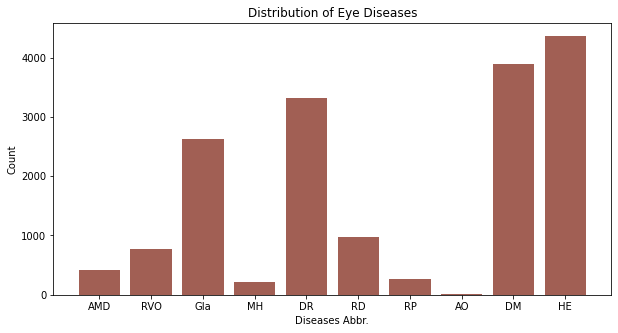

In [74]:
# distribution of different diseases
fig = plt.figure(figsize = (10, 5))
plt.bar(x_diseases, y_diseases, color ='#a15f54')
 
plt.xlabel("Diseases Abbr.")
plt.ylabel("Count")
plt.title("Distribution of Eye Diseases")
plt.show()

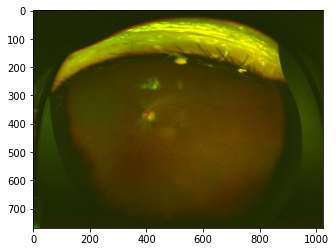

In [79]:
from matplotlib import image as mpimg
image = mpimg.imread("img/000000_00.jpg")
plt.imshow(image)
plt.show()

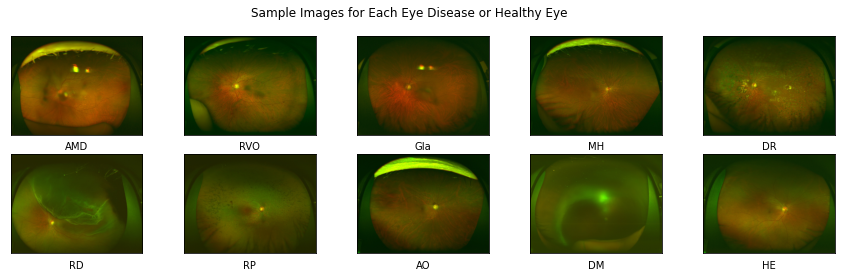

In [117]:
# sample images
# randomly selected figure name
r_f_l=[]
for x in x_diseases:
    tem_d=df[df[x]==1]
    tem_s=tem_d.sample(random_state=100)
    r_f_l.append(tem_s.iloc[0,0])
fig=plt.figure(figsize=(15, 4))
fig.suptitle("Sample Images for Each Eye Disease or Healthy Eye")
# f, axarr = plt.subplots(5,2) 
for i in range(10):
    plt.subplot(2, 5, i+1)
    image = mpimg.imread('img/'+r_f_l[i])
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(x_diseases[i]) 

plt.show()